# 2. Data Visualization

**Data Loading**

The data has been cleand in data wrangling notebook.  
Please refer to [`data_wrangling.ipynb`](https://github.com/ahrimhan/data-science-project/blob/master/project1/data_wrangling.ipynb) file.  
Here we load the saved data `final_school_data.csv`. This data set is too large to commit to GitHub, and you can download this file in the following link:  
[CAASPP test scores](https://drive.google.com/drive/folders/1puqmaVznmecKan-O6VNrqZy11MLeLzHo?usp=sharing).

In [1]:
import pandas as pd
import numpy as np

#To find the file encoding type
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob

#plotly
#import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
#plotly.tools.set_credentials_file(username='ahrimhan', api_key='iGryT0mF9uXxVgbnCgT9')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('final_school_data.csv', sep='\t', encoding='utf-8')
final_data = df
final_data.head()
final_data.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
final_data.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,English,14.58,31.25,33.33,20.83,96.0,25.00,50.00,25.00,17.71,58.33,23.96,13.54,75.00,11.46,29.17,53.13,17.71,696900
1,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,Mathematics,3.13,16.67,31.25,48.96,96.0,7.29,32.29,60.42,7.29,47.92,44.79,7.29,62.50,30.21,0.00,0.00,0.00,696900
2,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,English,33.00,39.55,14.86,12.59,397.0,47.21,37.31,15.48,43.12,41.30,15.58,30.20,59.14,10.66,43.40,44.92,11.68,696900
3,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,Mathematics,31.09,20.90,23.88,24.13,402.0,37.91,29.68,32.42,33.33,40.80,25.87,32.84,46.77,20.40,0.00,0.00,0.00,696900
4,1,All Students,All Students,1,61259,6057095,2018,7,Alameda,Oakland Unified,Westlake Middle,94612,English,2.70,14.11,17.72,65.47,333.0,5.71,26.43,67.87,5.11,27.63,67.27,3.60,45.05,51.35,8.41,35.44,56.16,696900


In [5]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427080 entries, 0 to 427079
Data columns (total 31 columns):
Subgroup ID                         427080 non-null int64
Student Groups                      427080 non-null object
Category                            427080 non-null object
County Code                         427080 non-null int64
District Code                       427080 non-null int64
School Code                         427080 non-null int64
Test Year                           427080 non-null int64
Type Id                             427080 non-null int64
County Name                         427080 non-null object
District Name                       427080 non-null object
School Name                         427080 non-null object
Zip Code                            427080 non-null int64
Test Id                             427080 non-null object
Percentage Standard Exceeded        427080 non-null float64
Percentage Standard Met             427080 non-null float64
Percentag

**Aggregation (School data to District and County levels)**

The score data at a county or a district level is not available. Thus, school data is grouped into the county or the district level. We only select the school data (`Type Id` == 7).

* **`Type Id` : Type of scores**

    * Type Id
    (‘04’ = State,
    ‘05’ = County,
    ‘06’ = District,
    ‘07’ = School,
    ‘09’ = Direct Funded Charter School,
    ‘10’ = Locally Funded Charter School)

In [6]:
final_data.groupby("Type Id").count()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
Type Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382
9,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600
10,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098


In [7]:
#school-level data

#for-later-use
final_data_school_all = final_data

final_data_school = final_data.loc[(final_data["Type Id"] == 7)]
final_data_school = final_data_school.round(2)
final_data_school['House_median'] = final_data_school['House_median'].astype('int64')
final_data = final_data_school

print("School Name")
print(final_data_school['School Name'].nunique())

School Name
6539


In [8]:
#county-level data
final_data_county = final_data.groupby(["County Name", "Student Groups", "Category", "Test Id"], as_index=False).mean()

final_data_county = final_data_county.round(2)
final_data_county['House_median'] = final_data_county['House_median'].astype('int64')

print(final_data_county.columns[0])
print(final_data_county['County Name'].nunique())

County Name
52


In [9]:
#district-level data
final_data_district = final_data.groupby(["District Name", "Student Groups", "Category", "Test Id"], as_index=False).mean()

final_data_district = final_data_district.round(2)
final_data_district['House_median'] = final_data_district['House_median'].astype('int64')

print(final_data_district.columns[0])
print(final_data_district["District Name"].nunique())

District Name
784


**Hypothesis**  

We first start with the following hypothesis.  
- The schools with many Asian students tend to achieve high scores.
- The schools with high-income families tend to achieve high scores.
- The schools with highly educated parents tend to achieve high scores.
- The schools surrounded by high house costs tend to achieve high scores.

**Type of graphs**

For utilizing advandced features, we used the [**seaborn**](https://seaborn.pydata.org/index.html), [**Bokeh**](http://bokeh.pydata.org/en/latest/), and [**Plotly**](https://plot.ly/python/) libraries (To Be Developed: TBD).  
The data was explored to find trends, insights, and potential outliers. 
In this California score data, there are 52 counties, 784 districts, and 6,539 schools.

* **Comparison (Bar plot)**

* **Correlations (Scatterplot)**
    
* **Distribution (Histogram)** - TBD

* **Time-Series plot**

## 2.1 Comparison (Bar plot)  - Category

**How do students are different in achievement levels for each category?**   

We provide two different version of bar plots for each category. The data is **grouped by counties**:
* all four achievement levels in a stacked bar
* specific achievement levels in a parallelized bar
    
### [Results]

* **Gender:**  
    **Female students exceed male students in English, while male students exceed female students in Mathematics.**  
    - In the English subject at the "Standard Exceeded" level, females students are 6.4% more than males students.
    - In the mathematics subject at the "Standard Exceeded" level, males students are 1.4% more than female students.
    - At the "Standard Met" above level ("Standard Exceeded" + "Standard Met"), females students are 10.8% more than males students in English (females: 50.9% > males: 40.1%). In mathematics, there are not much difference (males: 34.8% > females: 34.6%).
    - At the "Standard Met" above level , female students are 16.3% more in English than in mathematics. **The subject difference of female students is much higher than male students.** The males students are 5.3% more in English than in mathematics.  


* **Ethnicity:**  
    **In both English and mathematics, Asian students achieve the best performance, while Black or African American and American Indian or Alaska Native students achieve the lowest performance.** 
    - In both English and mathematics, **students' achievements are higher (there are the most "Standard Exceeded" students) in the order of Asian, Filipino, two or more races, and white.**
    - In both English and mathematics, **students' achievements are lower (there are the most "Standard Not Met" students) in the order of Black or African American, American Indian or Alaska Native, Native Hawaiian or Pacific Islander, and Hispanic or Latino.**
    -  **The ethnic group of students in the "Standard Not Met" level have much more difficulties in mathematics than English.**  

        
* **English-Language Fluency:**  
    **In both English and mathematics, Initial Fluent English Proficient (IFEP) students achieve the best performance.**   
    - In California, students whose home language is not English are required by law to be assessed in English language proficiency. Thus, the IFEP students have enough language proficiency or are native language speakers, and their parents may have moved from other countries and are immgirants. **This is very interesting insights that IFEP students highly exceed English only students in both English and mathematics.** The percentage of standard exceeded students of IFEP are 38.2% (English) and 33.1% (mathematics), while those of English only are 20.9% (English) and 15.9 (mathematics). I could observe that this trend becomes more obvious in the districts where many Asian immigrants live. From this result, **I can insist that immigrants have high educational interests and efforts.**  


* **Economic Status:**  
    **Economically disadvantaged students have much more difficulties than not-economically disadvantaged students.**  
    - **Almost half of the economically disadvantaged students are NOT standard met in mathematics.** For example, 45.4% of economically disadvantaged students are "Standard Not Met" in mathematics and 37.4% are "Standard Not Met" in English.  
    
    
* **Disability Status:**  
    **A small number of students with disabilities can achieve the best performance.** (English: 4.6%, mathematics: 4.5%).
    - The majority of students with disabilitie are in the "Standard Not Met" level (English: 66.7%, mathematics: 71.1%).
    - As in other disadvantaged or minor groups, the students with disability have more difficulties in mathematics.  
    
    
* **Parent Education:**  
    **The higher the level of parental education, the higher the achievement of students.**
    - The graphs apparently show that **students' achievements are higher in the order of the parents' education of "graduate school/post graduate", "college graduate", "some college (includes AA degree)" , "high school graduate", and "not a high school graduate".**

The student groups in each category are as follows.

In [10]:
#Student Groups (available in final_data)
final_data_school.groupby(["Category", "Student Groups"]).count()

Subgroup ID  \
Category                                     Student Groups                                                    
All Students                                 All Students                                              15313   
Disability Status                            Students with disability                                  13572   
                                             Students with no reported disability                      15181   
Economic Status                              Economically disadvantaged                                14960   
                                             Not economically disadvantaged                            13760   
English-Language Fluency                     English learner                                           12575   
                                             English learners (ELs) enrolled in school in th...          310   
                                             English learners enrolled in school in the U.S....        12412   
                                             English only                                              14976   
                                             Ever-ELs                                                  14239   
                                             Fluent English proficient and English only                15238   
                                             Initial fluent English proficient (IFEP)                   6118   
                                             Reclassified fluent English proficient (RFEP)             13118   
                                             To be determined (TBD)                                        7   
Ethnicity                                    American Indian or Alaska Native                            231   
                                             Asian                                                      7095   
                                             Black or African American                                  6128   
                                             Filipino                                                   3215   
                                             Hispanic or Latino                                        14752   
                                             Native Hawaiian or Pacific Islander                         393   
                                             Two or more races                                          5930   
                                             White                                                     11214   
Ethnicity for Economically Disadvantaged     American Indian or Alaska Native                            145   
                                             Asian                                                      4372   
                                             Black or African American                                  4756   
                                             Filipino                                                   1048   
                                             Hispanic or Latino                                        13838   
                                             Native Hawaiian or Pacific Islander                         222   
                                             Two or more races                                          1899   
                                             White                                                      8652   
Ethnicity for Not Economically Disadvantaged American Indian or Alaska Native                             40   
                                             Asian                                                      4598   
                                             Black or African American                                  1923   
                                             Filipino                                                   2138   
                                             Hispanic or Latino  

In [11]:
#finalize the data for visualization
#default: final_data = final_data_school
final_data = final_data_county

In [12]:
# all four achievement levels in a stacked bar
def stackedbar(df, category):
    scoreLevel = re.sub('Name', '', df.columns[0])
    
    df_local=df.loc[df['Category'] == category]
    #graph_columns = ['Category','Student Groups','Test Id', 'Percentage Standard Exceeded','Percentage Standard Met', 'Percentage Standard Nearly Met','Percentage Standard Not Met']
    graph_columns = ['Category','Student Groups','Test Id', 'Percentage Standard Not Met','Percentage Standard Nearly Met', 'Percentage Standard Met', 'Percentage Standard Exceeded']
    
    x= df_local[graph_columns]
    y=x.set_index(['Category', 'Student Groups', 'Test Id'])
    z=y.groupby(['Student Groups', 'Test Id']).mean()
    #TBD - use Bokeh libraries for exact number labeling
    #print(z)
    z.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=90)
    plt.title(scoreLevel + ": " + category)

In [13]:
final_id_vars = ['Subgroup ID',
 'Student Groups',
 'Category',
 'County Code',
 'District Code',
 'School Code',
 'Test Year',
 'Type Id',
 'School Name', 'District Name', 'County Name',
 'Zip Code',
 'Test Id',
 'Students with Scores',
 'Area 1 Percentage Above Standard',
 'Area 1 Percentage Near Standard',
 'Area 1 Percentage Below Standard',
 'Area 2 Percentage Above Standard',
 'Area 2 Percentage Near Standard',
 'Area 2 Percentage Below Standard',
 'Area 3 Percentage Above Standard',
 'Area 3 Percentage Near Standard',
 'Area 3 Percentage Below Standard',
 'Area 4 Percentage Above Standard',
 'Area 4 Percentage Near Standard',
 'Area 4 Percentage Below Standard',
 'House_median']

final_value_vars = ['Percentage Standard Exceeded',
 'Percentage Standard Met',
 'Percentage Standard Nearly Met',
 'Percentage Standard Not Met']

In [14]:
final_data_ex = pd.melt(final_data_school, id_vars=final_id_vars, value_vars=final_value_vars, var_name='Performance Group', value_name='Performance Group Percentage')
final_data_ex.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,School Name,District Name,County Name,Zip Code,Test Id,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median,Performance Group,Performance Group Percentage
0,1,All Students,All Students,1,61259,6057095,2018,7,Westlake Middle,Oakland Unified,Alameda,94612,English,333.0,5.71,26.43,67.87,5.11,27.63,67.27,3.60,45.05,51.35,8.41,35.44,56.16,696900,Percentage Standard Exceeded,2.70
1,1,All Students,All Students,1,61259,6057095,2018,7,Westlake Middle,Oakland Unified,Alameda,94612,Mathematics,345.0,3.19,17.68,79.13,4.06,25.22,70.72,1.16,31.01,67.83,0.00,0.00,0.00,696900,Percentage Standard Exceeded,1.74
2,1,All Students,All Students,1,61259,100701,2018,7,Metwest High,Oakland Unified,Alameda,94606,Mathematics,41.0,4.88,24.39,70.73,2.44,34.15,63.41,2.44,58.54,39.02,0.00,0.00,0.00,684400,Percentage Standard Exceeded,0.00
3,1,All Students,All Students,1,61259,100701,2018,7,Metwest High,Oakland Unified,Alameda,94606,English,39.0,28.21,33.33,38.46,10.26,46.15,43.59,20.51,64.10,15.38,20.51,43.59,35.90,684400,Percentage Standard Exceeded,12.82
4,1,All Students,All Students,1,61259,132688,2018,7,Dewey Academy,Oakland Unified,Alameda,94606,Mathematics,37.0,0.00,0.00,100.00,0.00,18.92,81.08,0.00,10.81,89.19,0.00,0.00,0.00,684400,Percentage Standard Exceeded,0.00


In [15]:
# specific achievement levels in a parallelized bar
def drawBarplotFacetGridEx(df, category, perfCols):
    df_local = df.loc[(df['Category'] == category)]
    
    df_local = df_local.loc[df_local['Performance Group'].isin(perfCols)]
    
    g = sns.FacetGrid(df_local, col="Test Id", height=6)
    g.map(sns.barplot, "Student Groups", "Performance Group Percentage", 'Performance Group', palette="rocket", ci=None )
    g.add_legend()
    g.set_xticklabels(rotation=90)
    g.fig.suptitle(category, size=20, x = 0.4, y = 1.1)
    plt.show()

### [Overall in counties]

**Gender**

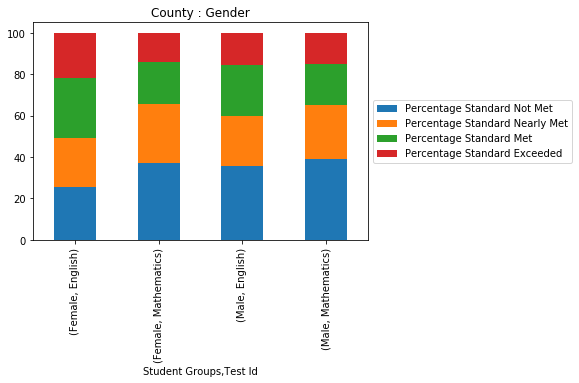

In [16]:
stackedbar(final_data, 'Gender')

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



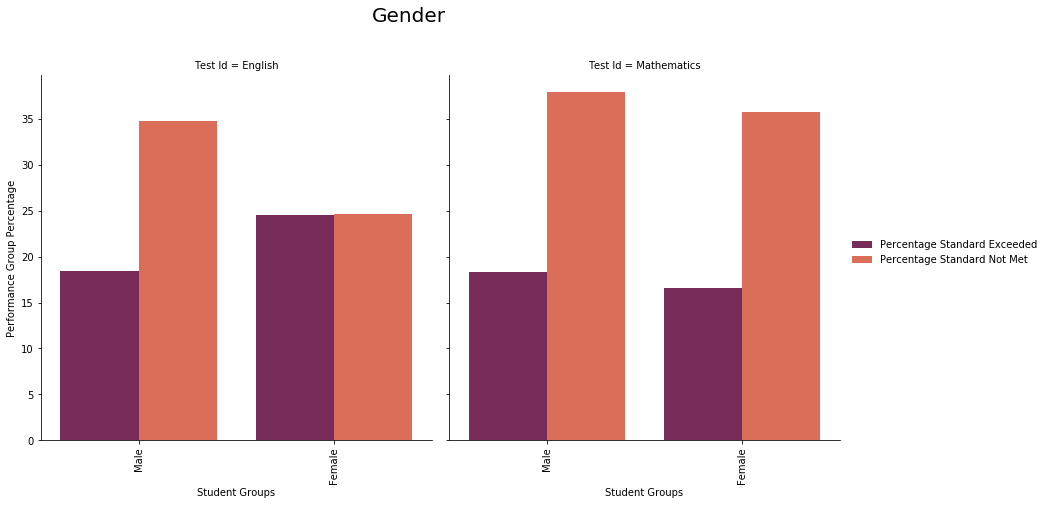

In [17]:
#FacetGrid : same legend
drawBarplotFacetGridEx(final_data_ex, 'Gender', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

**Ethnicity**

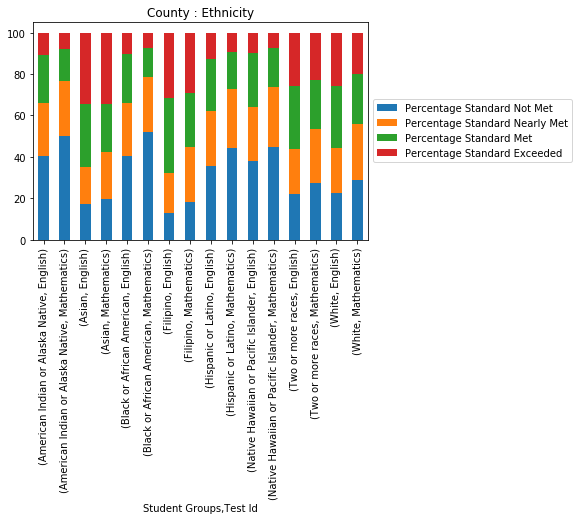

In [18]:
stackedbar(final_data, 'Ethnicity')

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



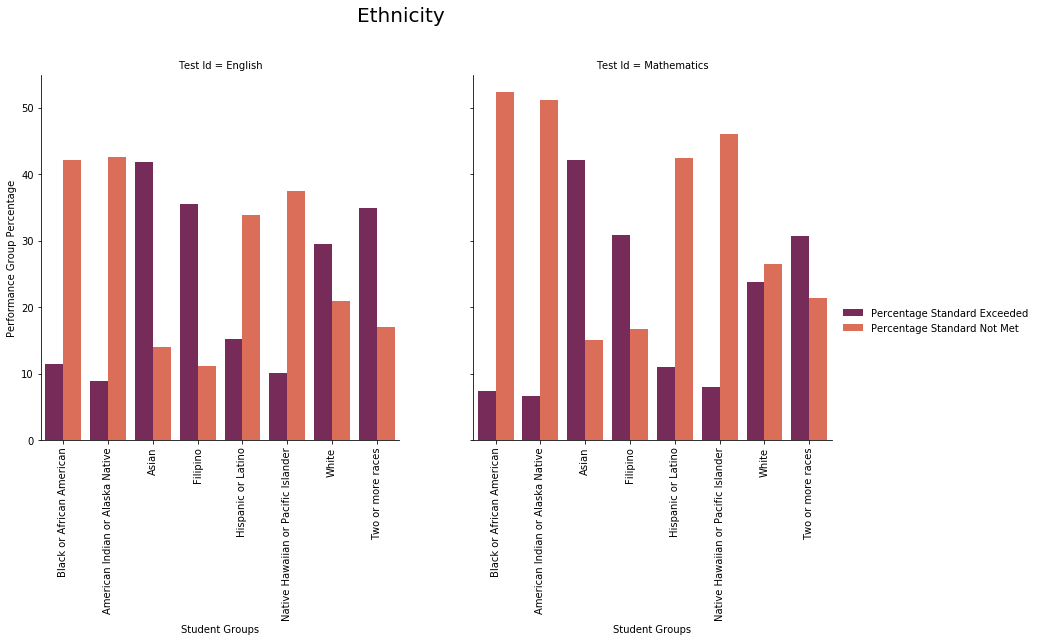

In [19]:
drawBarplotFacetGridEx(final_data_ex, 'Ethnicity', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

**English-Language Fluency**

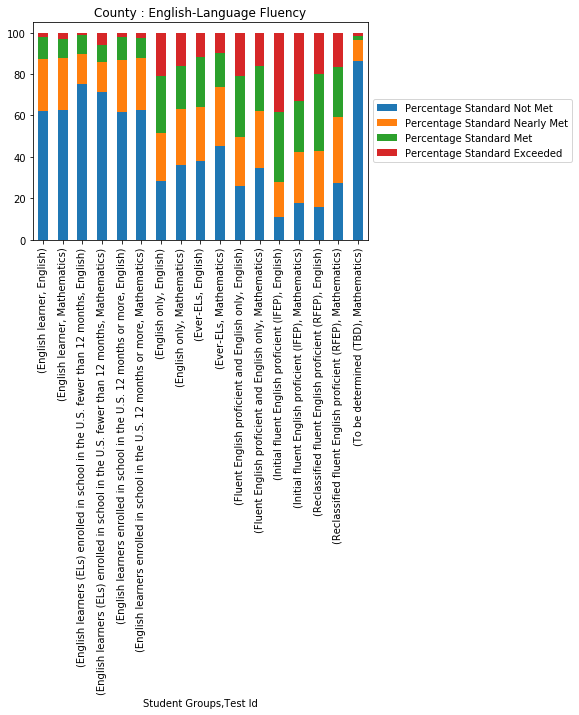

In [20]:
stackedbar(final_data, 'English-Language Fluency')

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



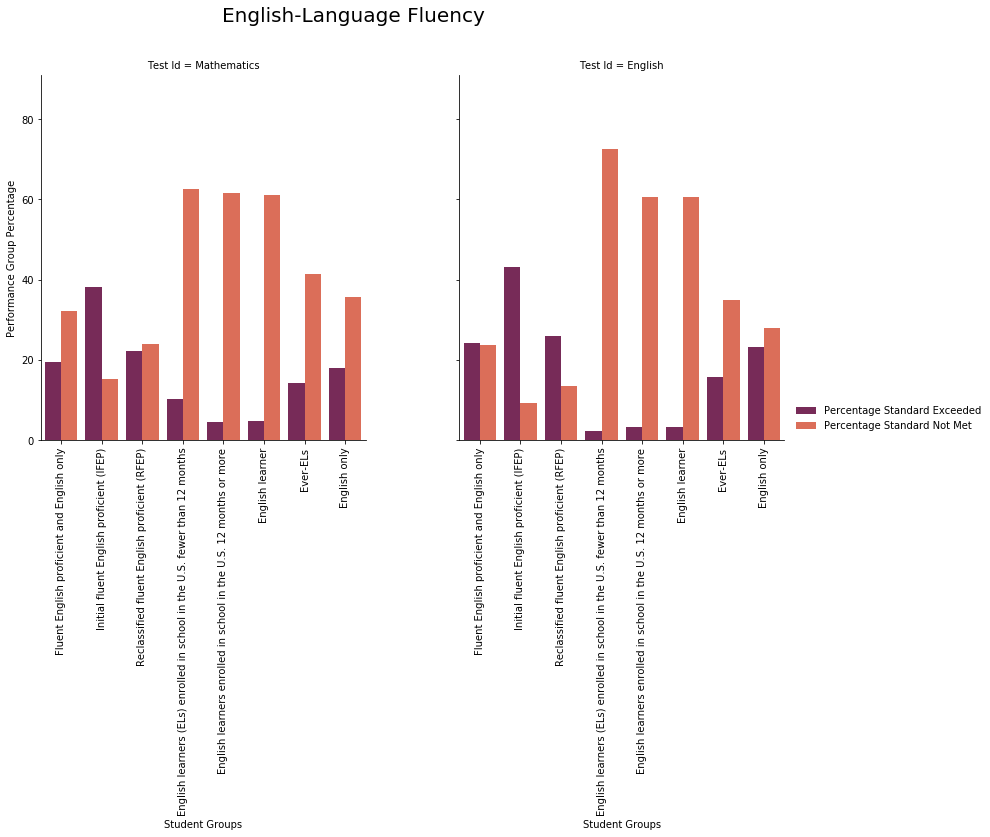

In [21]:
drawBarplotFacetGridEx(final_data_ex, 'English-Language Fluency', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

**Economic Status**

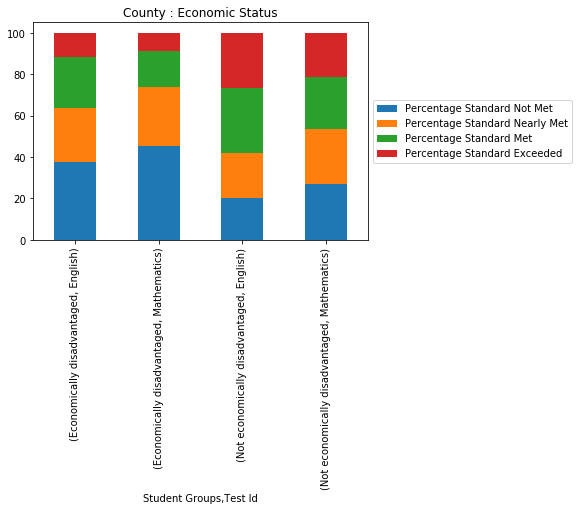

In [22]:
stackedbar(final_data, 'Economic Status')

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



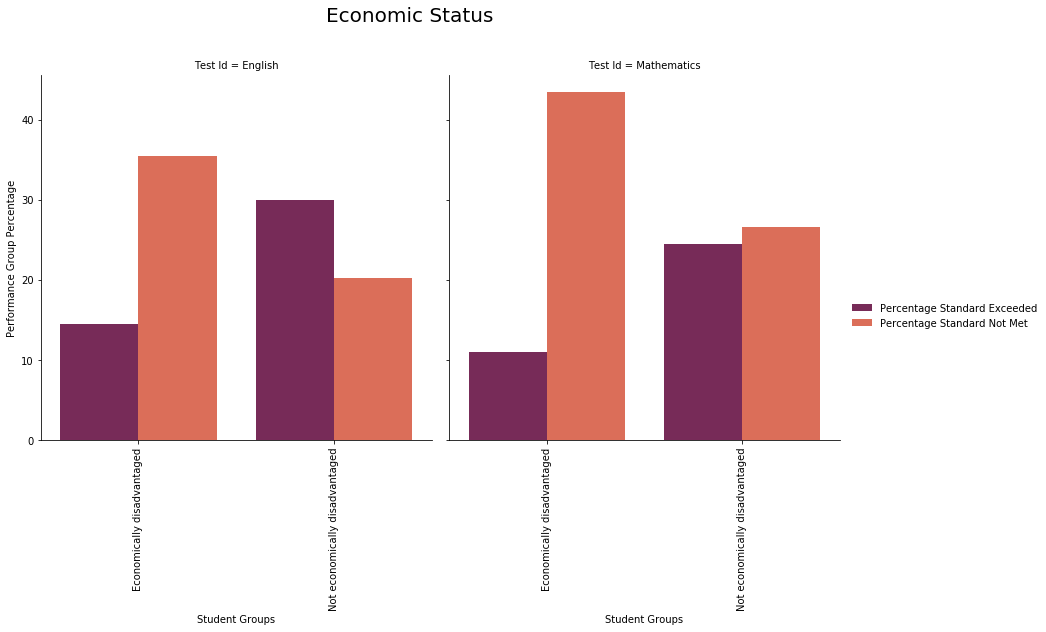

In [23]:
drawBarplotFacetGridEx(final_data_ex, 'Economic Status', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

**Disability Status**

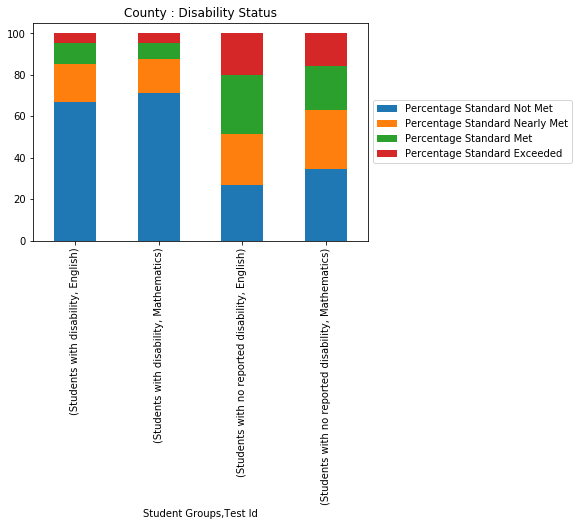

In [24]:
stackedbar(final_data, 'Disability Status')

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



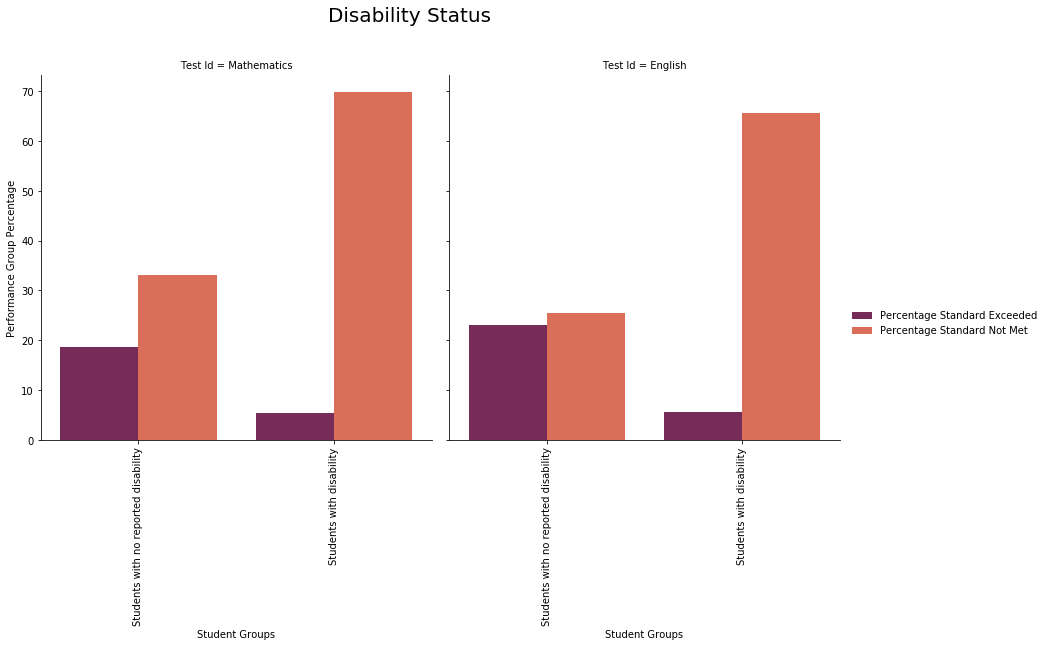

In [25]:
drawBarplotFacetGridEx(final_data_ex, 'Disability Status', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

**Parent Education**

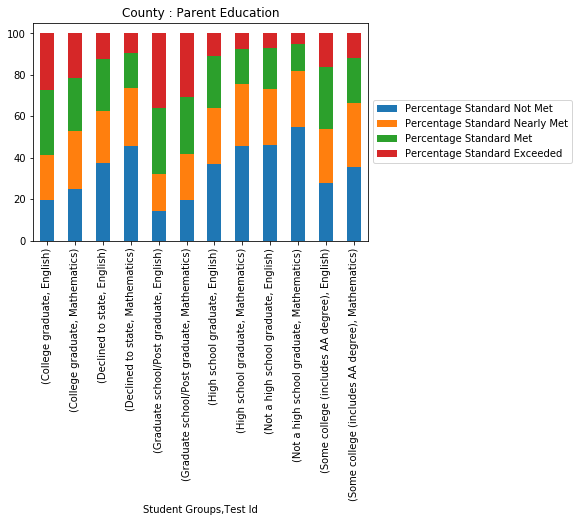

In [26]:
stackedbar(final_data, 'Parent Education')

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



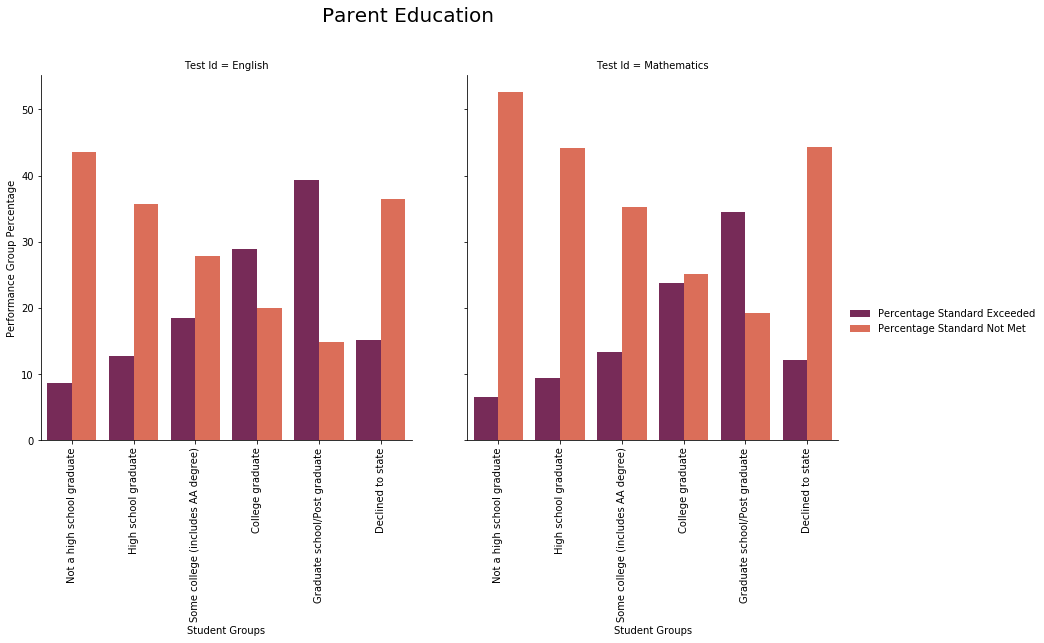

In [27]:
drawBarplotFacetGridEx(final_data_ex, 'Parent Education', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

## 2.2 Comparison (Bar plot)  -  Top and low performance counties

**What features can you find in the top and bottom performance groups?** 

We analyzed **5 best and worst performing counties** (58 counties x 10%).
The results can be summarized as follows.
* **English Top 5** County Names:
['Santa Clara', 'Marin', 'Placer', 'San Mateo', 'Orange']
* **Mathematics Top 5** County Names:
['Santa Clara', 'Marin', 'San Mateo', 'Orange', 'Placer']
* **English Low 5** County Names:
['Lake', 'Kings', 'Colusa', 'Humboldt', 'Monterey']
* **Mathematics Low 5** County Names:
['Lake', 'Kings', 'Merced', 'Mendocino', 'Monterey']

### [Results]

* The best performance counties have higher house median prices. In constrast, the worst performance conties have lower house median prices. **Thus, test performance is closely related to the economic capabilities of the family to which the student belongs.**

* We found that in the best performing counties, the percentage of white students is much higher than the percentage of white students in the whole county.

* Hispanic and Latino students are far more likely to be in the worst performing group than the best performing group. Likewise, black and American Indian students are more involved in the group with the worst results. In contrast, Asian and white students are more likely to be in the best performing group than the worst performing group.

* The English learners have more difficuties in studying both English and Mathematics than the fluent English speakers.

* When students' parents graduate from graduate schools/post graduates or colleges, students are much more likely to be in the best perfoming group. For those students, the best performing groups are much larger thatn the worst performing groups. In contrast, students are more likely to be in the worst perfoming group when their parents are high school graduates or have lower eduation.

### [Characteristics in the top and bottom performance groups in counties]

To have a rough insight, we have drawn the graphs of the test scores (i.e., "Performance Group Percentage" of each "Performance Group").

In [28]:
#sns.set(style="whitegrid")
sns.set_style(style='ticks')
sns.set(rc={'figure.figsize':(20,16)})

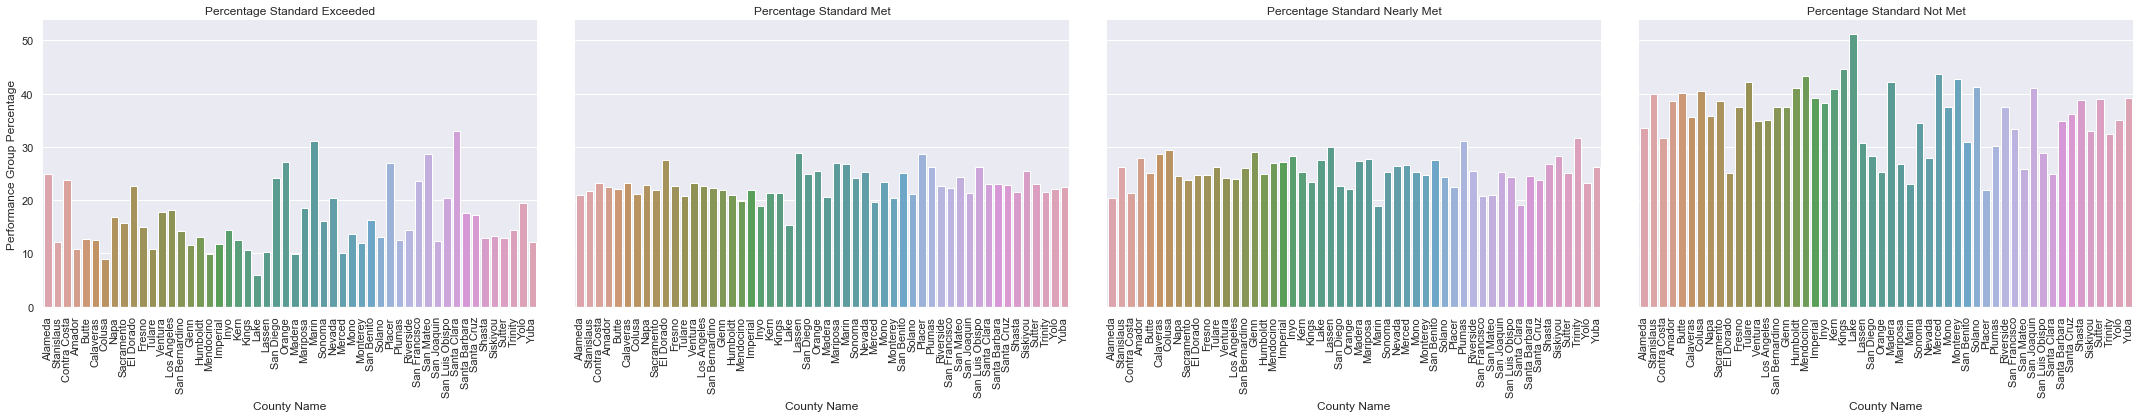

In [29]:
saturation_p =0.5
asepct_p = 1.5

def drawBarplotCatplot2(df, category, saturation_p, asepct_p, _x, _y, _col):
    df_local = df.loc[(df["Category"] == category)]
    
    #x="Student Groups", y="Students with Scores", col="Test Id", hue="Rank"
    g = sns.catplot(x=_x, y=_y, col=_col,
                data=df_local, saturation=saturation_p,
                kind="bar", ci=None, aspect=asepct_p)
    (
        g.set_axis_labels(_x, _y)
        .set_titles("{col_name}")
        .despine(left=True)
        .set_xticklabels(rotation=90)
    )  

drawBarplotCatplot2(final_data_ex, 'All Students', saturation_p, asepct_p, "County Name", "Performance Group Percentage", "Performance Group")

In [30]:
#df: data
#scoreLevel: "School Name", "District Name", "County Name"
#num: top and bottom parameter
def getDFTop_Low(df, scoreLevel, num):
    english_df = df.loc[(df["Student Groups"] == "All Students") 
                                   & (df["Test Id"] == "English")]    
    english_top = english_df.nlargest(num, 'Percentage Standard Exceeded')
    english_low = english_df.nlargest(num, 'Percentage Standard Not Met')
    
    math_df = df.loc[(df["Student Groups"] == "All Students") 
                                   & (df["Test Id"] == "Mathematics")]
    math_top = math_df.nlargest(num, 'Percentage Standard Exceeded')
    math_low = math_df.nlargest(num, 'Percentage Standard Not Met')
    
    print("{}{}{}{}{}".format("* English Top ", num, " ", scoreLevel,"s:"))
    #print Series
    print(english_top[scoreLevel].values.tolist())
    print("{}{}{}{}{}".format("* Mathematics Top ", num, " ", scoreLevel,"s:"))
    print(math_top[scoreLevel].values.tolist())
    print("{}{}{}{}{}".format("* English Low ", num, " ", scoreLevel,"s:"))
    print(english_low[scoreLevel].values.tolist())
    print("{}{}{}{}{}".format("* Mathematics Low ", num, " ", scoreLevel,"s:"))
    print(math_low[scoreLevel].values.tolist())
    
    #Retreive all data of the top and bottom schools/districts/counties
    top_english_all = df.loc[(df[scoreLevel].isin(english_top[scoreLevel])) &
                                                  (df["Test Id"] == "English")]
    low_english_all = df.loc[(df[scoreLevel].isin(english_low[scoreLevel])) &
                                                   (df["Test Id"] == "English")]
      
    top_math_all = df.loc[(df[scoreLevel].isin(math_top[scoreLevel])) &
                                                  (df["Test Id"] == "Mathematics")]
    low_math_all = df.loc[(df[scoreLevel].isin(math_low[scoreLevel])) &
                                                   (df["Test Id"] == "Mathematics")]
    
    top_english_all["Rank"] = "Top"
    low_english_all["Rank"] = "Bottom"
    top_math_all["Rank"] = "Top"
    low_math_all["Rank"] = "Bottom"
    
    df_local = pd.concat([top_english_all, low_english_all, top_math_all, low_math_all])
    
    return df_local

In [31]:
dfTop_Low = getDFTop_Low(final_data_county, "County Name", 5)
dfTop_Low

* English Top 5 County Names:
['Santa Clara', 'Marin', 'Placer', 'San Mateo', 'Orange']
* Mathematics Top 5 County Names:
['Santa Clara', 'Marin', 'San Mateo', 'Orange', 'Placer']
* English Low 5 County Names:
['Lake', 'Kings', 'Colusa', 'Humboldt', 'Monterey']
* Mathematics Low 5 County Names:
['Lake', 'Kings', 'Merced', 'Mendocino', 'Monterey']


,County Name,Student Groups,Category,Test Id,Subgroup ID,County Code,District Code,School Code,Test Year,Type Id,Zip Code,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median,Rank
1275,Marin,All Students,All Students,English,1.0,21.0,65428.86,4843039.23,2018.0,7.0,94929.21,32.55,28.89,17.29,21.27,295.93,35.88,41.72,22.41,35.29,41.61,23.10,25.76,60.60,13.64,35.64,45.55,18.81,1227675,Top
1277,Marin,Asian,Ethnicity,English,76.0,21.0,65750.43,4986058.68,2018.0,7.0,94924.79,47.76,31.94,13.59,6.72,25.75,50.31,40.46,9.23,53.52,37.64,8.84,36.07,57.77,6.16,53.14,40.55,6.31,1246200,Top
1279,Marin,Asian,Ethnicity for Economically Disadvantaged,English,202.0,21.0,65449.75,3585184.25,2018.0,7.0,94913.50,19.44,50.88,14.66,15.03,16.25,24.20,55.08,20.72,25.84,55.42,18.74,21.82,65.36,12.82,36.01,52.67,11.32,1029675,Top
1281,Marin,Asian,Ethnicity for Not Economically Disadvantaged,English,222.0,21.0,65838.45,5233516.91,2018.0,7.0,94923.09,52.27,30.02,13.01,4.70,23.77,53.45,38.40,8.15,58.75,35.56,5.69,38.50,56.39,5.11,54.36,39.72,5.92,1306122,Top
1283,Marin,Black or African American,Ethnicity,English,74.0,21.0,65427.67,4398329.50,2018.0,7.0,94934.67,13.60,19.42,19.66,47.31,20.33,18.44,34.91,46.65,15.95,39.44,44.60,12.32,58.25,29.43,19.81,36.14,44.05,1132983,Top
1285,Marin,Black or African American,Ethnicity for Economically Disadvantaged,English,200.0,21.0,65436.00,4057820.33,2018.0,7.0,94954.33,1.08,16.71,17.31,64.90,23.33,6.75,32.49,60.76,4.62,37.11,58.28,10.64,54.77,34.59,5.00,40.32,54.68,1061933,Top
1287,Marin,Black or African American,Ethnicity for Not Economically Disadvantaged,English,220.0,21.0,65318.00,6024202.00,2018.0,7.0,94903.00,30.77,30.77,23.08,15.38,13.00,23.08,61.54,15.38,30.77,46.15,23.08,23.08,61.54,15.38,46.15,38.46,15.38,964100,Top
1289,Marin,College graduate,Parent Education,English,93.0,21.0,66474.49,5029739.51,2018.0,7.0,94931.27,41.14,33.50,15.87,9.49,105.56,44.83,43.23,11.94,43.24,45.18,11.58,33.03,59.65,7.32,44.52,46.34,9.14,1260922,Top
1291,Marin,Declined to state,Parent Education,English,121.0,21.0,60365.44,4735942.22,2018.0,7.0,94924.11,22.28,35.34,17.49,24.89,111.78,27.36,43.80,28.84,34.23,38.92,26.85,20.29,56.55,23.15,31.46,45.90,22.63,1536488,Top
1293,Marin,Economically disadvantaged,Economic Status,English,31.0,21.0,66251.59,4753899.15,2018.0,7.0,94927.30,13.79,26.04,24.13,36.04,103.35,18.07,46.47,35.46,18.02,44.03,37.95,13.70,62.92,23.38,19.04,49.76,31.21,1170354,Top


**House Prices**

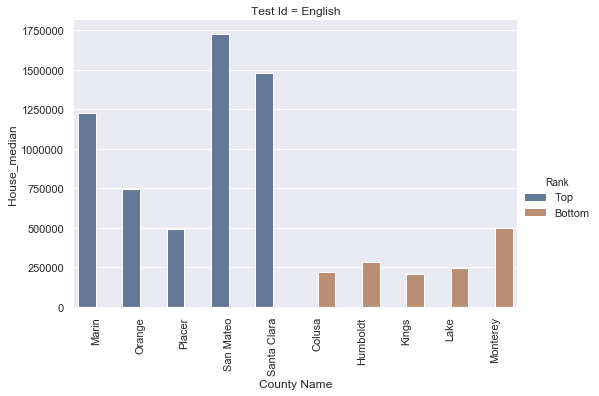

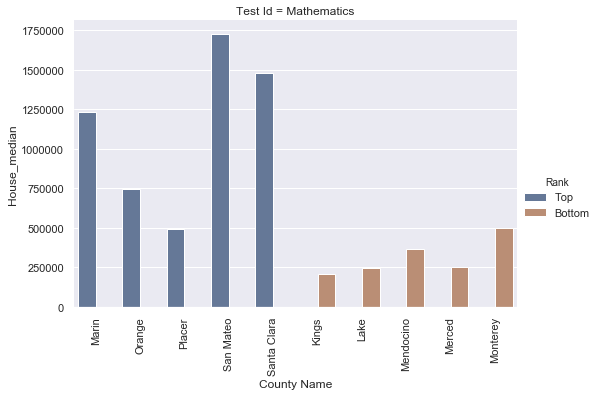

In [32]:
def drawBarplotCatplot1(df, category, testId, _x, _y, _hue, _col):
    df_local = df.loc[(df["Category"] == category) & (df['Test Id'] == testId)]
    g = sns.catplot(x=_x, y=_y, hue=_hue, col=_col,
                    data=df_local, saturation=saturation_p,
                    kind="bar", ci=None, aspect=asepct_p)
    (g.set_axis_labels(_x, _y)
     # .set_xticklabels(["Men", "Women", "Children"])
     #.set(ylim=(0, 1))
     .despine(left=True)
     .set_xticklabels(rotation=90))  

drawBarplotCatplot1(dfTop_Low, "All Students", "English", "County Name", "House_median", "Rank", "Test Id")
drawBarplotCatplot1(dfTop_Low, "All Students", "Mathematics", "County Name", "House_median", "Rank", "Test Id")

#drawBarplotCatplot(dfTop_Low, "All Students", saturation_p, asepct_p, "County Name", "House_median", "Test Id", "Rank")

In [33]:
def drawBarplotCatplot(df, category, saturation_p, asepct_p, _x, _y, _col, _hue):
    df_local = df.loc[(df["Category"] == category)]
    
    #x="Student Groups", y="Students with Scores", col="Test Id", hue="Rank"
    g = sns.catplot(x=_x, y=_y, col=_col, hue=_hue,
                data=df_local, saturation=saturation_p,
                kind="bar", ci=None, aspect=asepct_p)
    (
        g.set_axis_labels(category, "Number of Students")
        # .set_xticklabels(["Men", "Women", "Children"])
        .set_titles("{col_name} {col_var}")
        #  .set(ylim=(0, 1))
        .despine(left=True)
        .set_xticklabels(rotation=90)
    )  

**Gender**

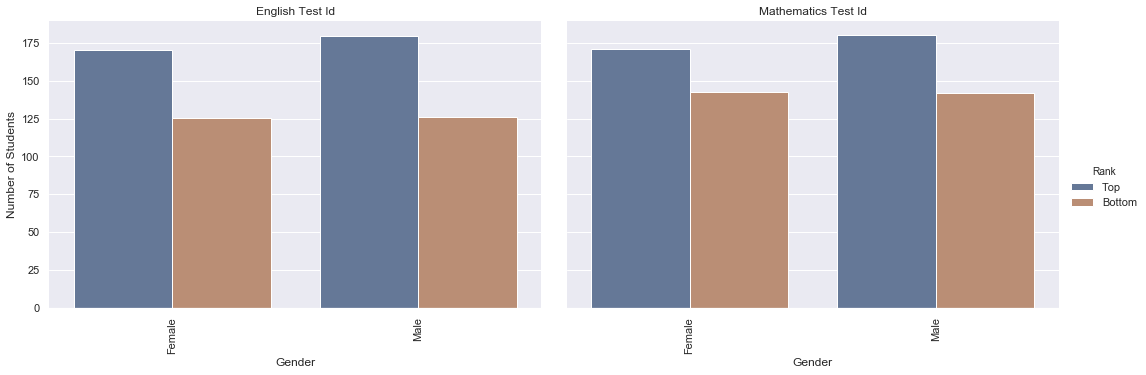

In [34]:
drawBarplotCatplot(dfTop_Low, "Gender", saturation_p, asepct_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

**Ethnicity**

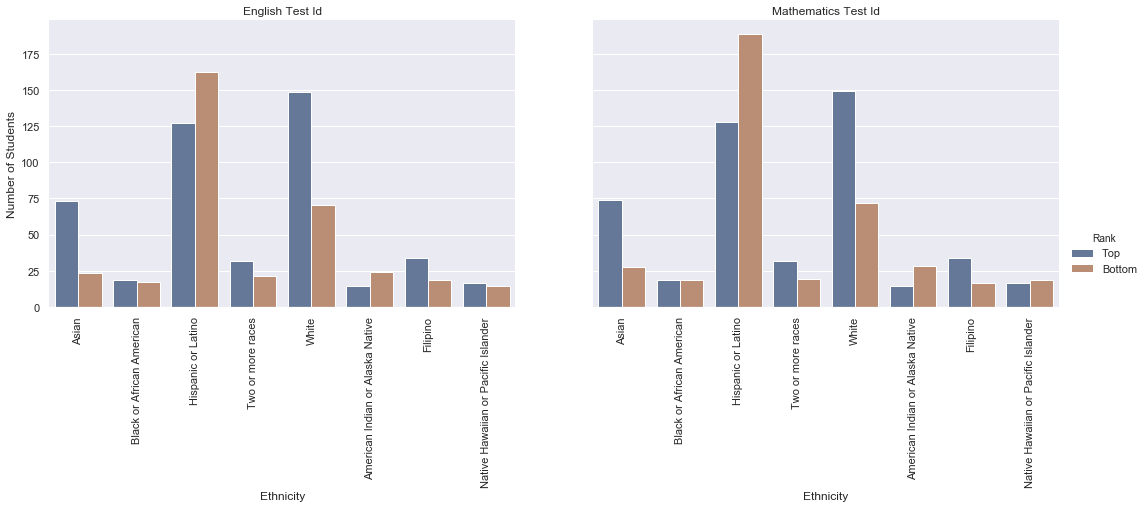

In [35]:
drawBarplotCatplot(dfTop_Low, "Ethnicity", saturation_p, asepct_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

**English-Language Fluency**

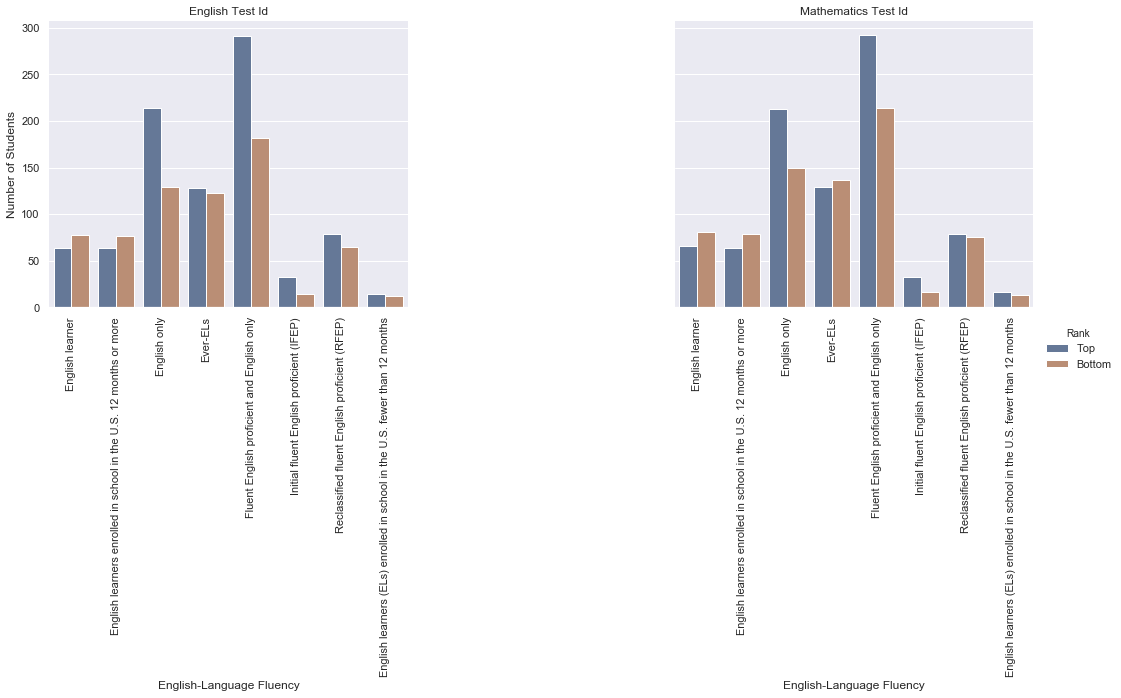

In [36]:
drawBarplotCatplot(dfTop_Low, "English-Language Fluency", saturation_p, asepct_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

**Economic Status**

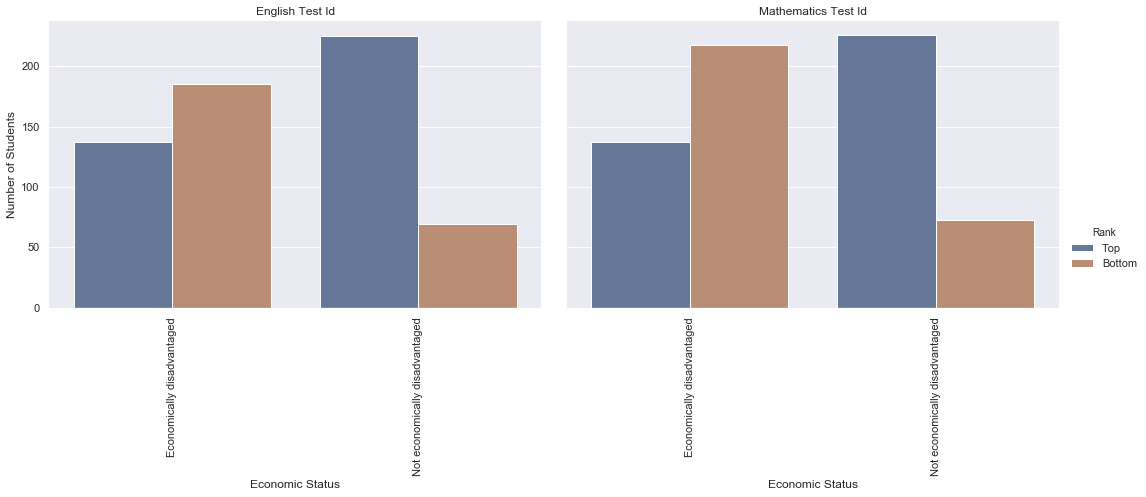

In [37]:
drawBarplotCatplot(dfTop_Low, "Economic Status", saturation_p, asepct_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

**Parent Education**

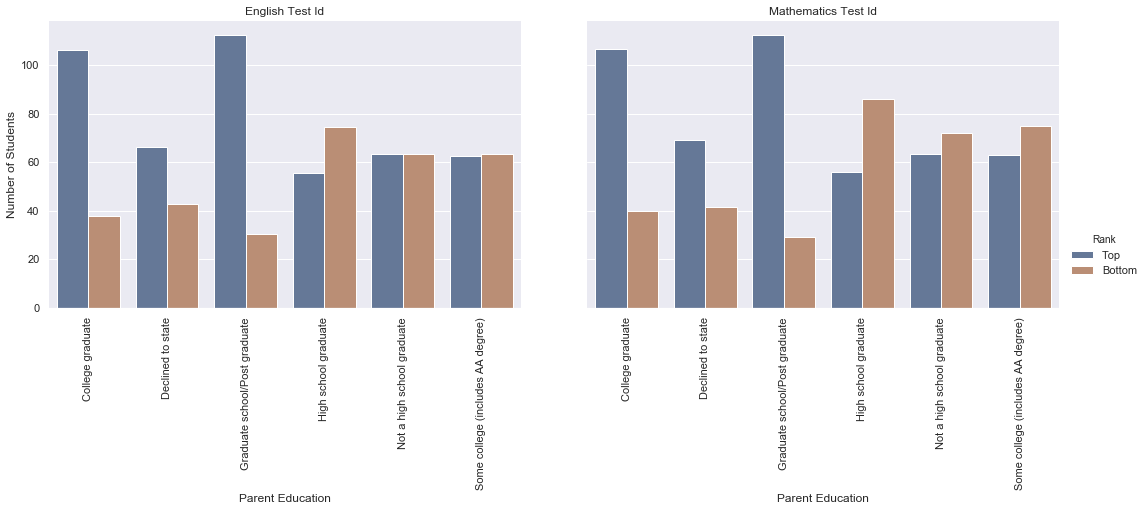

In [38]:
drawBarplotCatplot(dfTop_Low, "Parent Education", saturation_p, asepct_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

### [Individual Top and Bottom schools in Each Category]

In [39]:
#List of data of the best performance students for each student groups
idx = final_data_school.groupby(["Category", "Student Groups"])["Percentage Standard Exceeded"].transform(max) == final_data_school["Percentage Standard Exceeded"]
final_data_school[idx].head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
6357,1,All Students,All Students,19,64733,133736,2018,7,Los Angeles,Los Angeles Unified,Science Academy Stem Magnet,91423,Mathematics,92.82,6.22,0.96,0.0,209.0,95.69,4.31,0.0,88.04,11.96,0.00,89.95,10.05,0.0,0.00,0.00,0.0,1092600
23781,3,Male,Gender,19,64733,133736,2018,7,Los Angeles,Los Angeles Unified,Science Academy Stem Magnet,91423,Mathematics,94.37,4.93,0.70,0.0,142.0,97.18,2.82,0.0,88.03,11.97,0.00,90.85,9.15,0.0,0.00,0.00,0.0,1092600
38313,4,Female,Gender,19,64212,1931880,2018,7,Los Angeles,Abc Unified,Whitney (Gretchen) High,90703,English,91.48,8.20,0.33,0.0,305.0,90.49,9.51,0.0,94.43,5.25,0.33,67.21,32.79,0.0,91.15,8.85,0.0,722800
58087,6,Fluent English proficient and English only,English-Language Fluency,19,64733,133736,2018,7,Los Angeles,Los Angeles Unified,Science Academy Stem Magnet,91423,Mathematics,92.82,6.22,0.96,0.0,209.0,95.69,4.31,0.0,88.04,11.96,0.00,89.95,10.05,0.0,0.00,0.00,0.0,1092600
69450,7,Initial fluent English proficient (IFEP),English-Language Fluency,1,61275,6002281,2018,7,Alameda,Piedmont City Unified,Beach Elementary,94611,English,100.00,0.00,0.00,0.0,11.0,90.91,9.09,0.0,72.73,27.27,0.00,72.73,27.27,0.0,90.91,9.09,0.0,1287100


In [40]:
#List of data of the lowest performance students for each student groups
idx = final_data_school.groupby(["Category", "Student Groups"])["Percentage Standard Not Met"].transform(max) == final_data_school["Percentage Standard Not Met"]
final_data_school[idx].head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
12,1,All Students,All Students,1,61259,132688,2018,7,Alameda,Oakland Unified,Dewey Academy,94606,Mathematics,0.0,0.0,0.0,100.0,37.0,0.0,0.00,100.00,0.0,18.92,81.08,0.0,10.81,89.19,0.0,0.00,0.00,684400
65,1,All Students,All Students,1,10017,130419,2018,7,Alameda,Alameda County Office Of Education,Alameda County Community,94544,Mathematics,0.0,0.0,0.0,100.0,30.0,0.0,0.00,100.00,0.0,6.67,93.33,0.0,16.67,83.33,0.0,0.00,0.00,649300
103,1,All Students,All Students,1,61259,130146,2018,7,Alameda,Oakland Unified,Rudsdale Continuation,94605,Mathematics,0.0,0.0,0.0,100.0,48.0,0.0,0.00,100.00,0.0,6.25,93.75,0.0,25.00,75.00,0.0,0.00,0.00,655900
104,1,All Students,All Students,1,61259,130146,2018,7,Alameda,Oakland Unified,Rudsdale Continuation,94605,English,0.0,0.0,0.0,100.0,48.0,0.0,20.83,79.17,0.0,0.00,100.00,0.0,31.25,68.75,0.0,8.33,91.67,655900
938,1,All Students,All Students,7,10074,120444,2018,7,Contra Costa,Contra Costa County Office Of Education,Mt. Mckinley,94553,Mathematics,0.0,0.0,0.0,100.0,60.0,0.0,0.00,100.00,0.0,10.00,90.00,0.0,28.33,71.67,0.0,0.00,0.00,613200


## 2.3 Correlations (Scatterplot)

We provide the scatter plots between two following factors.  
* Percentage of Standard Exceeded vs. House prices
* Percentage of Standard Not Met vs. House prices
   
### [Results]
We could observe the strong correlations between the test scores and the house prices.
In conclusion, students who live in areas with high housing prices have higher test scores.

In [41]:
def drawScatterplot(df, category, levelName, perfCol):
    df_local = df.loc[(df['Category'] == category)]
    #g = sns.FacetGrid(df_local, col="Test Id", hue="Student Groups")
    g = sns.FacetGrid(df_local, col="Test Id", hue="Student Groups", size=10)
    g.map(plt.scatter, levelName, perfCol, alpha=.7)
    g.add_legend();
    g.set_xticklabels(rotation=90) 

#drawScatterplot(final_data, 'Ethnicity', "County Name", 'Percentage Standard Not Met')

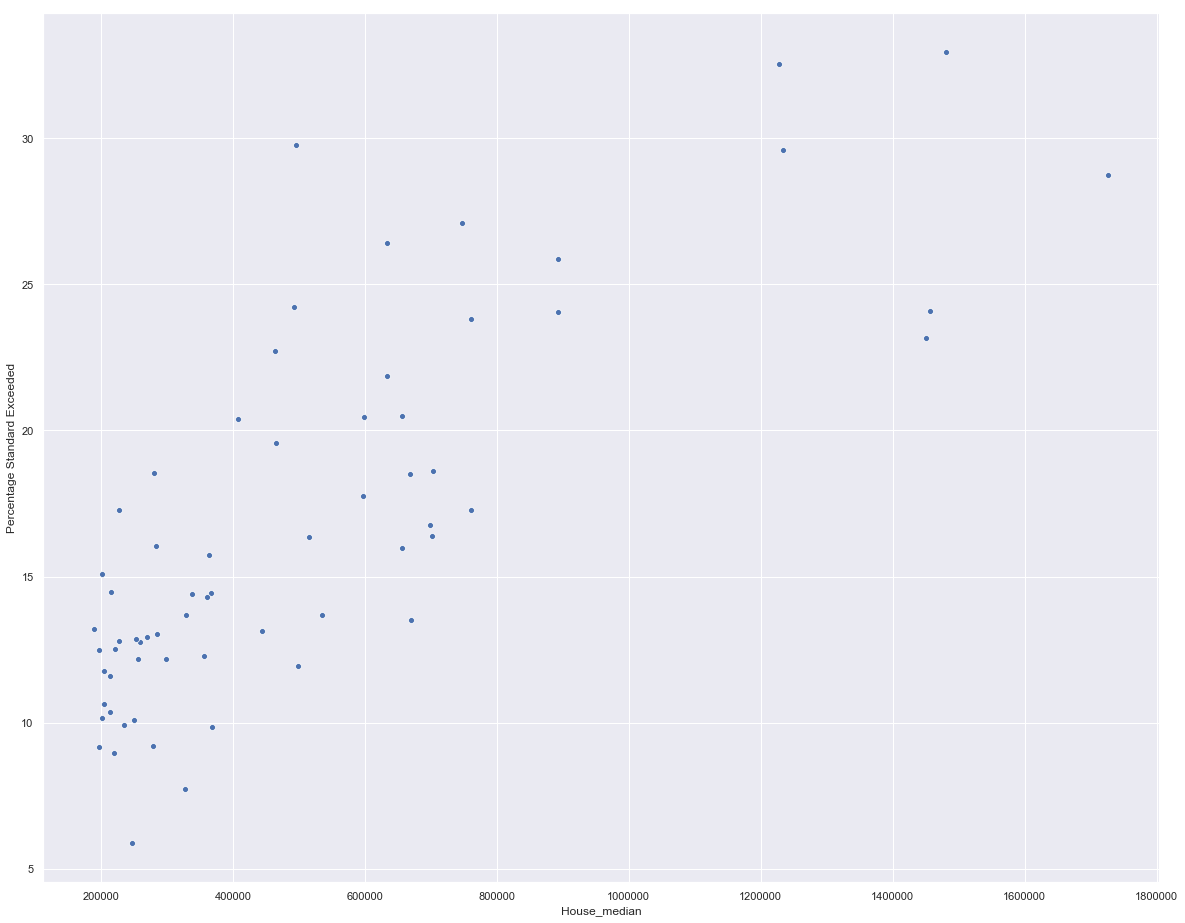

In [42]:
df_local = final_data.loc[(final_data['Student Groups'] == "All Students")].groupby('School Code').mean()
ax = sns.scatterplot(x="House_median", y='Percentage Standard Exceeded', data=df_local)

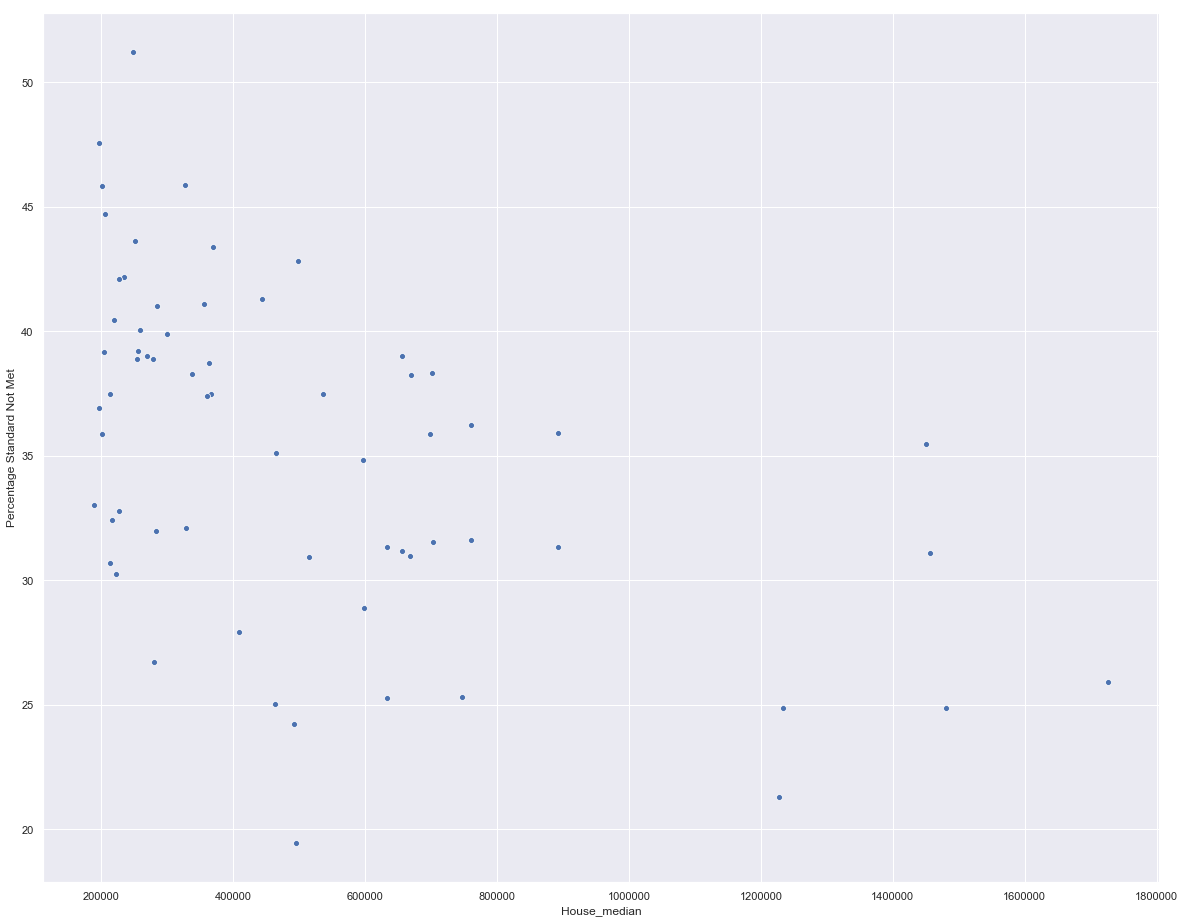

In [43]:
df_local = final_data.loc[(final_data['Student Groups'] == "All Students")].groupby('School Code').mean()
ax = sns.scatterplot(x="House_median", y='Percentage Standard Not Met', data=df_local)

## 2.4 Distribution (Histogram)

TBD

## 2.5 Time-Series Plot

TBD

## 2.6 Future Work (To consider more)

**To Be Developed (TBD)**  
* Time-Series plots
    * Year 2015, 2016, 2017, 2018: Percentage of Standard Exceeded of (current year - last year)] 
* Histogram
    * House price correlation with the test performance (bin 10: house_cost <25K, ...., house_cost > 100k)
* More external factors
    * Teachers demographics
* Bokeh or Plotly libraries 
    * Switch barplots to interactive graphs
    * Longitude, latitude information to visualize the score distribution on the map (Plotly libraries)
* Use more of special metrics
    * Ex) Score_gap = |Standard Exceeded % - Standard Not Met %|

**Need to be more consider**  
* Not all data available for subgroups - skewed?
* Need to eliminate outliers?
    * Ex) (new schools (e.g., Eastwood elementary), etc.) - top and bottom 5% schools need to be excluded.
* Further analysis on the High-income whites vs. Low-income whites 
    * Ex) (df.loc[(df['House_median'] > 130k) & (df['Subgroup Id'] == whites)]
* More insights? Trends? More hypothesis?
    * Much more score differnces in mathematics in (high schools groups / minority groups)

In [44]:
#replace plotly -> bokeh
#cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
#math_top.iplot(kind='bar', barmode='stack', filename='cufflinks/stacked-bar-chart') 

# Miscellaneous

**Functions**

In [45]:
def getScoreLevel(df):
    scoreLevel = ''
    for col in df.columns:
        if col == "County Name" or col == "District Name" or col == "School Name":
            if not df[col].isnull().any().any():
                print(col)
                scoreLevel = re.sub('Name', '', col)
    return scoreLevel

def get_id_vals(df):
    final_id_vars = []   
    scoreLevel =  getScoreLevel(df)    
    if "School" in scoreLevel:
        final_id_vars = final_id_vars_schools
    elif "District" in scoreLevel:
        final_id_vars = final_id_vars_districts
    elif "County" in scoreLevel:
        final_id_vars = final_id_vars_counties
    else:
        print("no matching level")   
    return final_id_vars

In [46]:
#Create a column "ratio"
#scoreLevel: "School Name", "District Name", "County Name"
def createColumnApply(df, scoreLevel, category, sum_col, new_col):

    #flatten multi index for the results obtained from groupby
    df_sum = df.groupby([scoreLevel, category], as_index=False).sum()
    #create new column "Scores_sum": sum grouped by category 
    #Example: new_col = "Scores_sum", sum_col = "Students with Scores"
    df_sum[new_col] = df_sum[sum_col]

    df_newcol = pd.merge(df, df_sum[[scoreLevel, category, new_col]], 
                                           how='left', on=[scoreLevel, category])

    #create a new column using lambda func.
    #axis = 1 or ‘columns’: apply function to each row
    #apply function should be modified for the usage
    df_newcol["ratio"] = df_newcol.apply(lambda x: x[sum_col]/x[new_col]*100, axis=1)
    #Formatted to second decimal place
    df_newcol = df_newcol.round(2)

**School Types**  
We could not find any special results regarding the school type.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



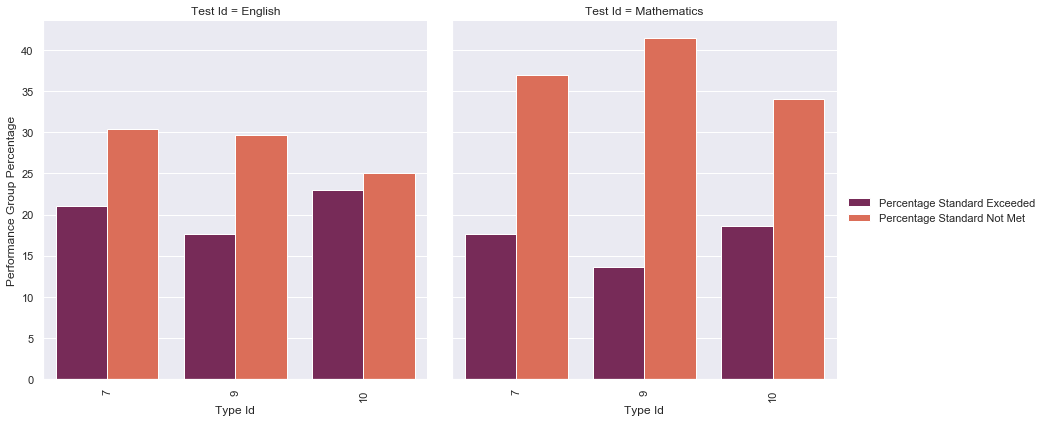

In [47]:
final_data_school_all_ex = pd.melt(final_data_school_all, id_vars=final_id_vars, value_vars=final_value_vars, var_name='Performance Group', value_name='Performance Group Percentage')


def drawBarplotFacetGridEx2(df, _col, perfCols):
    df_local = df.loc[df['Performance Group'].isin(perfCols)]
    
    g = sns.FacetGrid(df_local, col=_col, height=6)
    g.map(sns.barplot, "Type Id", "Performance Group Percentage", 'Performance Group', palette="rocket", ci=None )
    g.add_legend()
    g.set_xticklabels(rotation=90)
    plt.show()

drawBarplotFacetGridEx2(final_data_school_all_ex, "Test Id", ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

**Specific schools, district, or counties (CDS)**  

To obtain the test scores of specific schools, districts, or counties, the **exact school codes** needs to be retrieved from entity tables. When finding the school codes, you should specify a **county**, a **district**, and a **school** names because there may exist several schools with the same names. These are denoted as the **‘CDS’**. 

For example, if we want the obtain the school code of the `Eastwood Elementary` school in `Irvine` district and `Orange` county, we first select the DataFrame using the names of the **county**, **district**, and **school** conditions all together.

Please note that if we specify only the school name(s), we could retrieve the several schools with the same names. It is important to include these three codes to avoid the double-counting in any summary calculations.

In [48]:
final_data = final_data_school_all
final_data.loc[(final_data['School Name'] == 'Eastwood Elementary') & 
             (final_data['District Name'] == 'Irvine Unified') & 
             (final_data['County Name'] == 'Orange'), :].head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
9279,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300
9280,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66,927300
26647,3,Male,Gender,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,44.44,27.78,17.59,10.19,108.0,56.48,28.70,14.81,41.67,42.59,15.74,38.89,47.22,13.89,0.00,0.00,0.00,927300
26648,3,Male,Gender,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,28.42,38.95,17.89,14.74,95.0,38.95,41.05,20.00,31.58,49.47,18.95,18.95,65.26,15.79,31.58,51.58,16.84,927300
43761,4,Female,Gender,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,40.63,34.38,12.50,12.50,96.0,39.58,44.79,15.63,48.96,38.54,12.50,26.04,64.58,9.38,41.67,45.83,12.50,927300


We can retrieve the DataFrames of the **county** and the **district**. For example, we can obtain the test score of `Irvine Unified` District as follows.

In [49]:
# Irvine Unified Code
irvine_district = final_data.loc[(final_data['District Name'] == 'Irvine Unified') & 
               (final_data['County Name'] == 'Orange'), :]
irvine_district.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
9275,1,All Students,All Students,30,73650,127472,2018,7,Orange,Irvine Unified,Jeffrey Trail Middle,92620,Mathematics,60.85,19.84,11.30,8.01,1124.0,68.24,20.82,10.94,61.65,29.63,8.72,61.30,32.65,6.05,0.00,0.00,0.00,927300
9276,1,All Students,All Students,30,73650,127472,2018,7,Orange,Irvine Unified,Jeffrey Trail Middle,92620,English,46.26,37.46,9.96,6.32,1124.0,54.80,35.50,9.70,59.88,33.45,6.67,34.16,59.25,6.58,60.14,34.52,5.34,927300
9277,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,Mathematics,49.72,22.33,16.89,11.07,533.0,57.41,26.45,16.14,49.53,36.40,14.07,49.91,38.46,11.63,0.00,0.00,0.00,927300
9278,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,English,50.48,29.09,10.60,9.83,519.0,45.28,43.55,11.18,53.95,34.10,11.95,41.04,51.64,7.32,54.14,36.99,8.86,927300
9279,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300


In [50]:
#retreive only "Elementary schools"
irvine_district_elementary = irvine_district[irvine_district["School Name"].str.contains('Elementary')]
irvine_district_elementary.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
9277,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,Mathematics,49.72,22.33,16.89,11.07,533.0,57.41,26.45,16.14,49.53,36.40,14.07,49.91,38.46,11.63,0.00,0.00,0.00,927300
9278,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,English,50.48,29.09,10.60,9.83,519.0,45.28,43.55,11.18,53.95,34.10,11.95,41.04,51.64,7.32,54.14,36.99,8.86,927300
9279,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300
9280,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66,927300
9283,1,All Students,All Students,30,73650,6085344,2018,7,Orange,Irvine Unified,Woodbury Elementary,92620,Mathematics,38.43,32.44,19.21,9.92,635.0,52.60,30.87,16.54,42.83,42.83,14.33,44.41,42.52,13.07,0.00,0.00,0.00,927300


* English Top 5 School Names:
['Turtle Rock Elementary', 'Santiago Hills Elementary', 'Stonegate Elementary', 'Brywood Elementary', 'Portola Springs Elementary']
* Mathematics Top 5 School Names:
['Turtle Rock Elementary', 'Santiago Hills Elementary', 'Brywood Elementary', 'Stonegate Elementary', 'Westpark Elementary']
* English Low 5 School Names:
['Culverdale Elementary', 'University Park Elementary', 'Springbrook Elementary', 'Greentree Elementary', 'Eastwood Elementary']
* Mathematics Low 5 School Names:
['Culverdale Elementary', 'University Park Elementary', 'Northwood Elementary', 'Springbrook Elementary', 'Greentree Elementary']


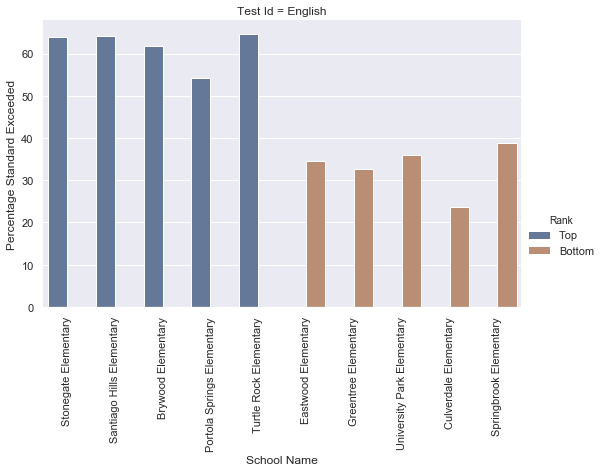

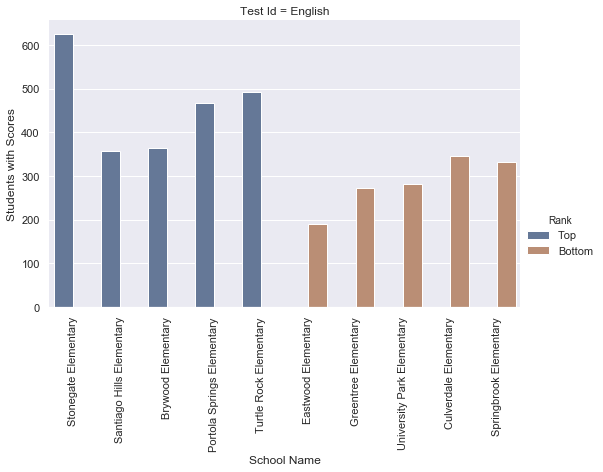

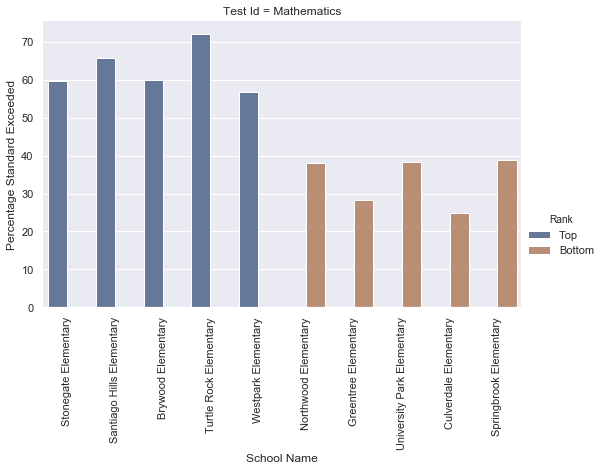

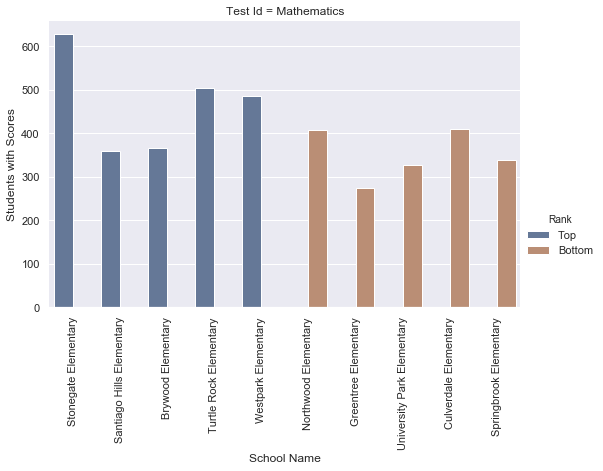

In [51]:
dfTop_Low_irvine = getDFTop_Low(irvine_district_elementary, "School Name", 5)

drawBarplotCatplot1(dfTop_Low_irvine, "All Students", "English", "School Name", "Percentage Standard Exceeded", "Rank", "Test Id")
drawBarplotCatplot1(dfTop_Low_irvine, "All Students", "English", "School Name", "Students with Scores", "Rank", "Test Id")


drawBarplotCatplot1(dfTop_Low_irvine, "All Students", "Mathematics", "School Name", "Percentage Standard Exceeded", "Rank", "Test Id")
drawBarplotCatplot1(dfTop_Low_irvine, "All Students", "Mathematics", "School Name", "Students with Scores", "Rank", "Test Id")